In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_app_train = pd.read_csv('../data/application_train.csv')
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_app_train.shape

(307511, 122)

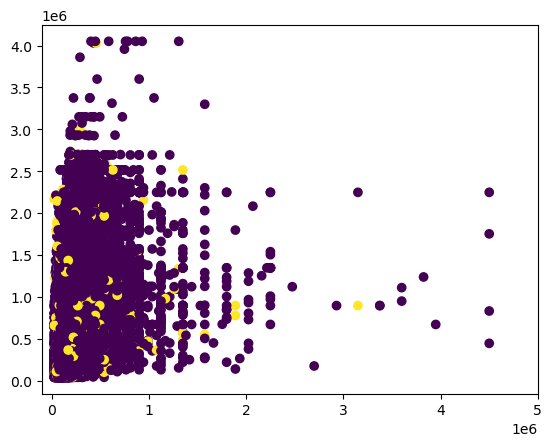

In [4]:
plt.scatter(x=df_app_train['AMT_INCOME_TOTAL'], y=df_app_train['AMT_CREDIT'], c=df_app_train['TARGET'])
plt.xlim(-100000, 5000000)
plt.show()

In [35]:
df_target_0 = df_app_train[df_app_train["TARGET"] == 0]

In [36]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CODE_GENDER"], margins=True, normalize="columns")

CODE_GENDER,F,M,XNA,All
TARGET,,,,
0,0.930007,0.898581,1.0,0.919271
1,0.069993,0.101419,0.0,0.080729


In [37]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_CAR"], margins=True, normalize="columns")

FLAG_OWN_CAR,N,Y,All
TARGET,,,
0,0.914998,0.927563,0.919271
1,0.085002,0.072437,0.080729


In [38]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_REALTY"], margins=True, normalize="columns")

FLAG_OWN_REALTY,N,Y,All
TARGET,,,
0,0.916751,0.920384,0.919271
1,0.083249,0.079616,0.080729


In [ ]:
conditions = [
    (df_app_train["FLAG_OWN_REALTY"] == 'Y') & (df_app_train["FLAG_OWN_CAR"] == 'Y'),
    (df_app_train["FLAG_OWN_REALTY"] == 'Y'),
    (df_app_train["FLAG_OWN_CAR"] == 'Y')
]
choices = [
    "BOTH",
    "REALTY",
    "CAR"
]

realty_and_car = np.select(conditions, choices, default="NEITHER")
pd.crosstab(df_app_train["TARGET"], realty_and_car, margins=True, normalize='columns')

In [ ]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CNT_CHILDREN"], margins=True, normalize="columns")

In [ ]:
df_app_train["YEARS_BIRTH"] = np.floor(abs(df_app_train["DAYS_BIRTH"])/365)
age = df_app_train.groupby('YEARS_BIRTH')['TARGET'].agg('mean').reset_index()
age.plot(x="YEARS_BIRTH", y="TARGET")

In [ ]:
age_ge = df_app_train.groupby(['YEARS_BIRTH', "CODE_GENDER"])['TARGET'].agg('mean').reset_index()
ax = age_ge[age_ge["CODE_GENDER"] == "M"].plot(x="YEARS_BIRTH", y="TARGET", label="M")
age_ge[age_ge["CODE_GENDER"] == "F"].plot(x="YEARS_BIRTH", y="TARGET", label="F", ax=ax)
age_ge[age_ge["CODE_GENDER"] == "XNA"].plot(x="YEARS_BIRTH", y="TARGET", label="XNA", ax=ax)
plt.show()

In [ ]:
plt.hist(df_app_train["YEARS_BIRTH"], bins=50)